In [ ]:
import pandas as pd
air=pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
air.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
air.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [ ]:
air.shape

(144, 2)

In [ ]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
date=["12/02/2001","01/11/2000","18/11/2000","23/08/2001","07/02/2001"]
date=pd.DataFrame(date)

In [ ]:
date=date.rename(columns={0:"Date"})

In [ ]:
date.dtypes

Date    object
dtype: object

In [ ]:
pd.to_datetime(date.Date,format="%d/%m/%Y")

0   2001-02-12
1   2000-11-01
2   2000-11-18
3   2001-08-23
4   2001-02-07
Name: Date, dtype: datetime64[ns]

In [ ]:
date.index=date.Date

In [ ]:
date.head()

,Date
Date,
12/02/2001,12/02/2001
01/11/2000,01/11/2000
18/11/2000,18/11/2000
23/08/2001,23/08/2001
07/02/2001,07/02/2001


In [ ]:
air["Month"]=pd.to_datetime(air["Month"])

In [ ]:
air.index=air.Month

In [ ]:
air.drop("Month",axis=1,inplace=True)

In [ ]:
air.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
pd.date_range(start="1949-01",end="1961-01",freq="M")

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')

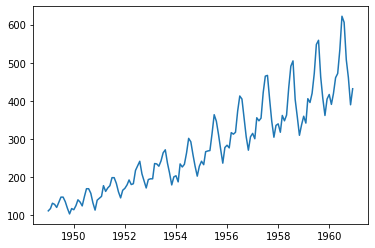

In [ ]:
import matplotlib.pyplot as plt
plt.plot(air.index,air.Passengers)

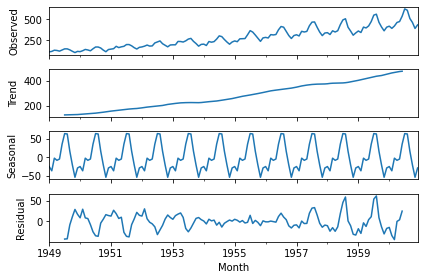

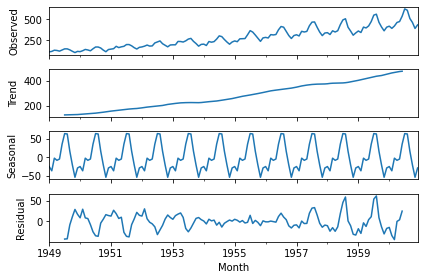

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(air).plot()

In [ ]:
train=air.iloc[:132]
test=air.iloc[132:]

In [ ]:
naive=train.tail(1)

In [ ]:
print(naive)

            Passengers
Month                 
1959-12-01         405


In [ ]:
test.head()

,Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472


In [ ]:
test["Naive"]=405

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test.head()

,Passengers,Naive
Month,,
1960-01-01,417,405
1960-02-01,391,405
1960-03-01,419,405
1960-04-01,461,405
1960-05-01,472,405


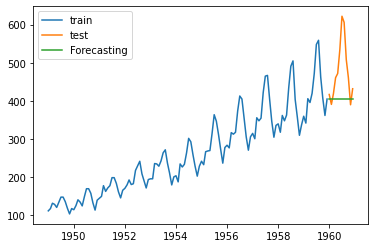

In [ ]:
plt.plot(train)
plt.plot(test)
plt.legend(["train","test","Forecasting"])

In [ ]:
test1=air.iloc[132:]

In [ ]:
air.Passengers.mean()

280.2986111111111

In [ ]:
test1["Naive"]=280.2986111111111

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


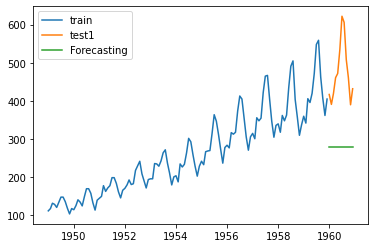

In [ ]:
plt.plot(train)
plt.plot(test1)
plt.legend(["train","test1","Forecasting"])

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test.Passengers,test.Naive, squared=False)

102.97653454387881

In [ ]:
mean_squared_error(test1.Passengers,test1.Naive, squared=False)

209.5322586365556

In [ ]:
air.dtypes

Passengers    int64
dtype: object

In [ ]:
roll=air.shift(1)

In [ ]:
airroll=air.rolling(window=12).mean()

In [ ]:
test2=airroll.tail(12)

In [ ]:
mean_squared_error(test2.Passengers,test.Passengers, squared=False)

75.21419644736108

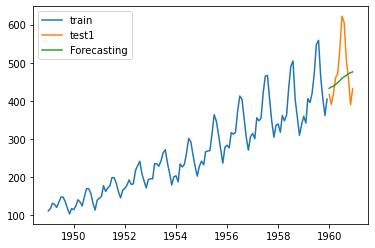

In [ ]:
plt.plot(train)
plt.plot(test.Passengers)
plt.plot(test2)
plt.legend(["train","test1","Forecasting"])

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
model=ExponentialSmoothing(train,seasonal_periods=12,seasonal="mul").fit(smoothing_level=0.2, smoothing_slope=0.2,smoothing_seasonal=0.2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
data=model.forecast(12)

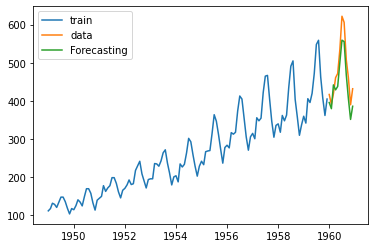

In [ ]:
plt.plot(train)
plt.plot(test.Passengers)
plt.plot(data)
plt.legend(["train","data","Forecasting"])

In [ ]:
mean_squared_error(test.Passengers,data, squared=False)

39.849869614410125

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

ModuleNotFoundError: ignored